## image classification using ML Binary

### Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('banknotes.csv')
df.shape

(1372, 5)

In [5]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### Seperate the input and output variables

In [6]:
# Input data
x = df.drop('Class', axis=1)
# Output data
y = df['Class']

#### Explore the data

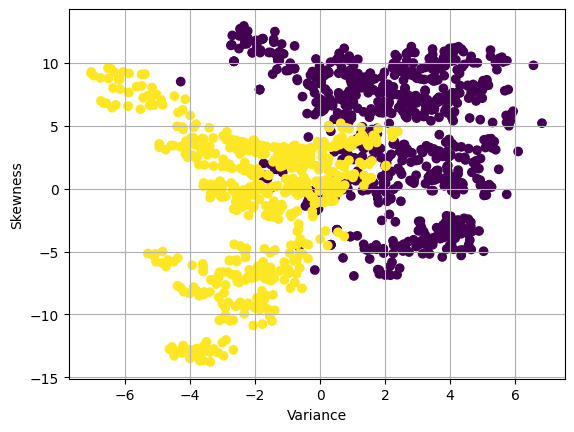

In [11]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.grid()
plt.scatter(df['Variance'], df['Skewness'], c=y)

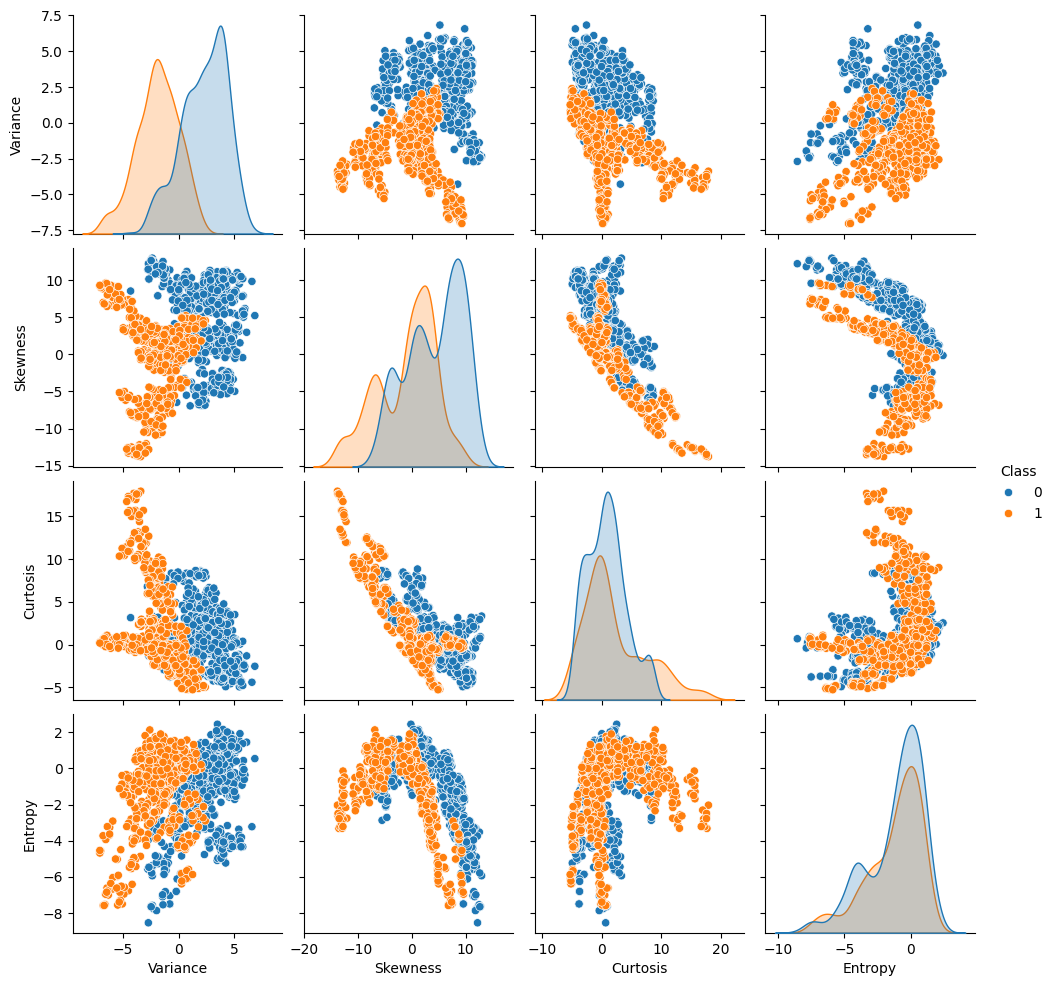

In [15]:
sns.pairplot(df, hue='Class')

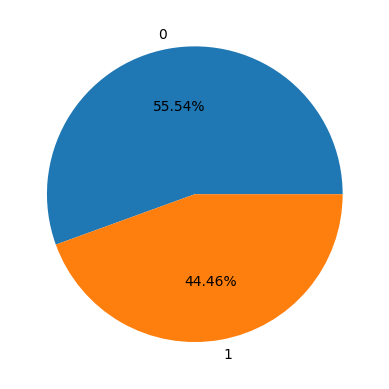

In [19]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [20]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Cross Validation

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [27]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

In [28]:
y_train.shape, y_test.shape

((1029,), (343,))

#### Build the model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier(random_state=0)

In [32]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Performance evaluation

In [33]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [34]:
y_pred = dt.predict(x_test)

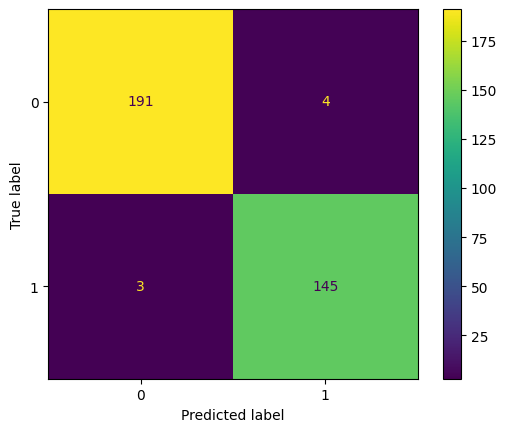

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [37]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



### Feature Importance

<BarContainer object of 4 artists>

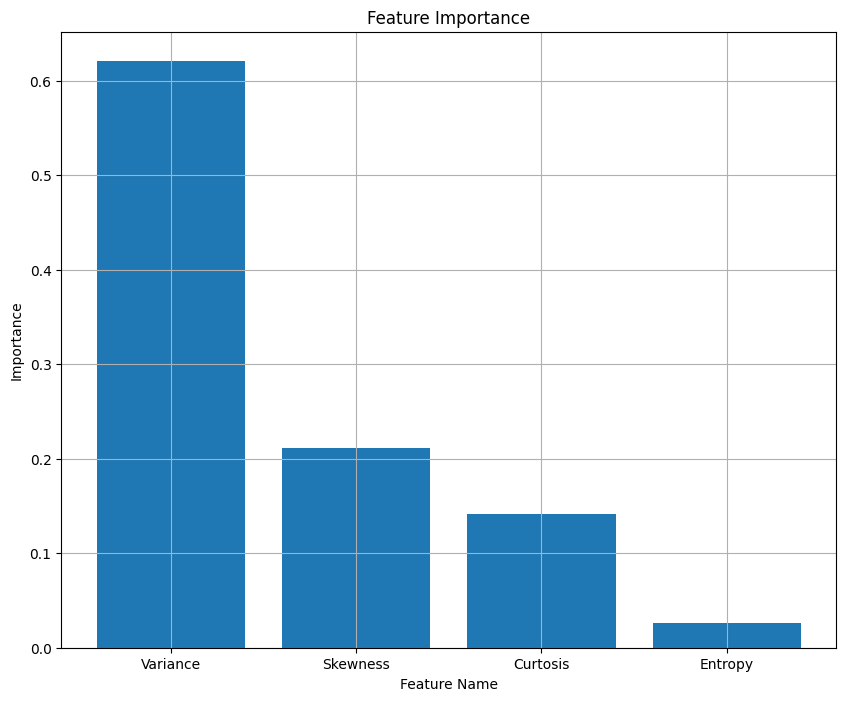

In [42]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, dt.feature_importances_)

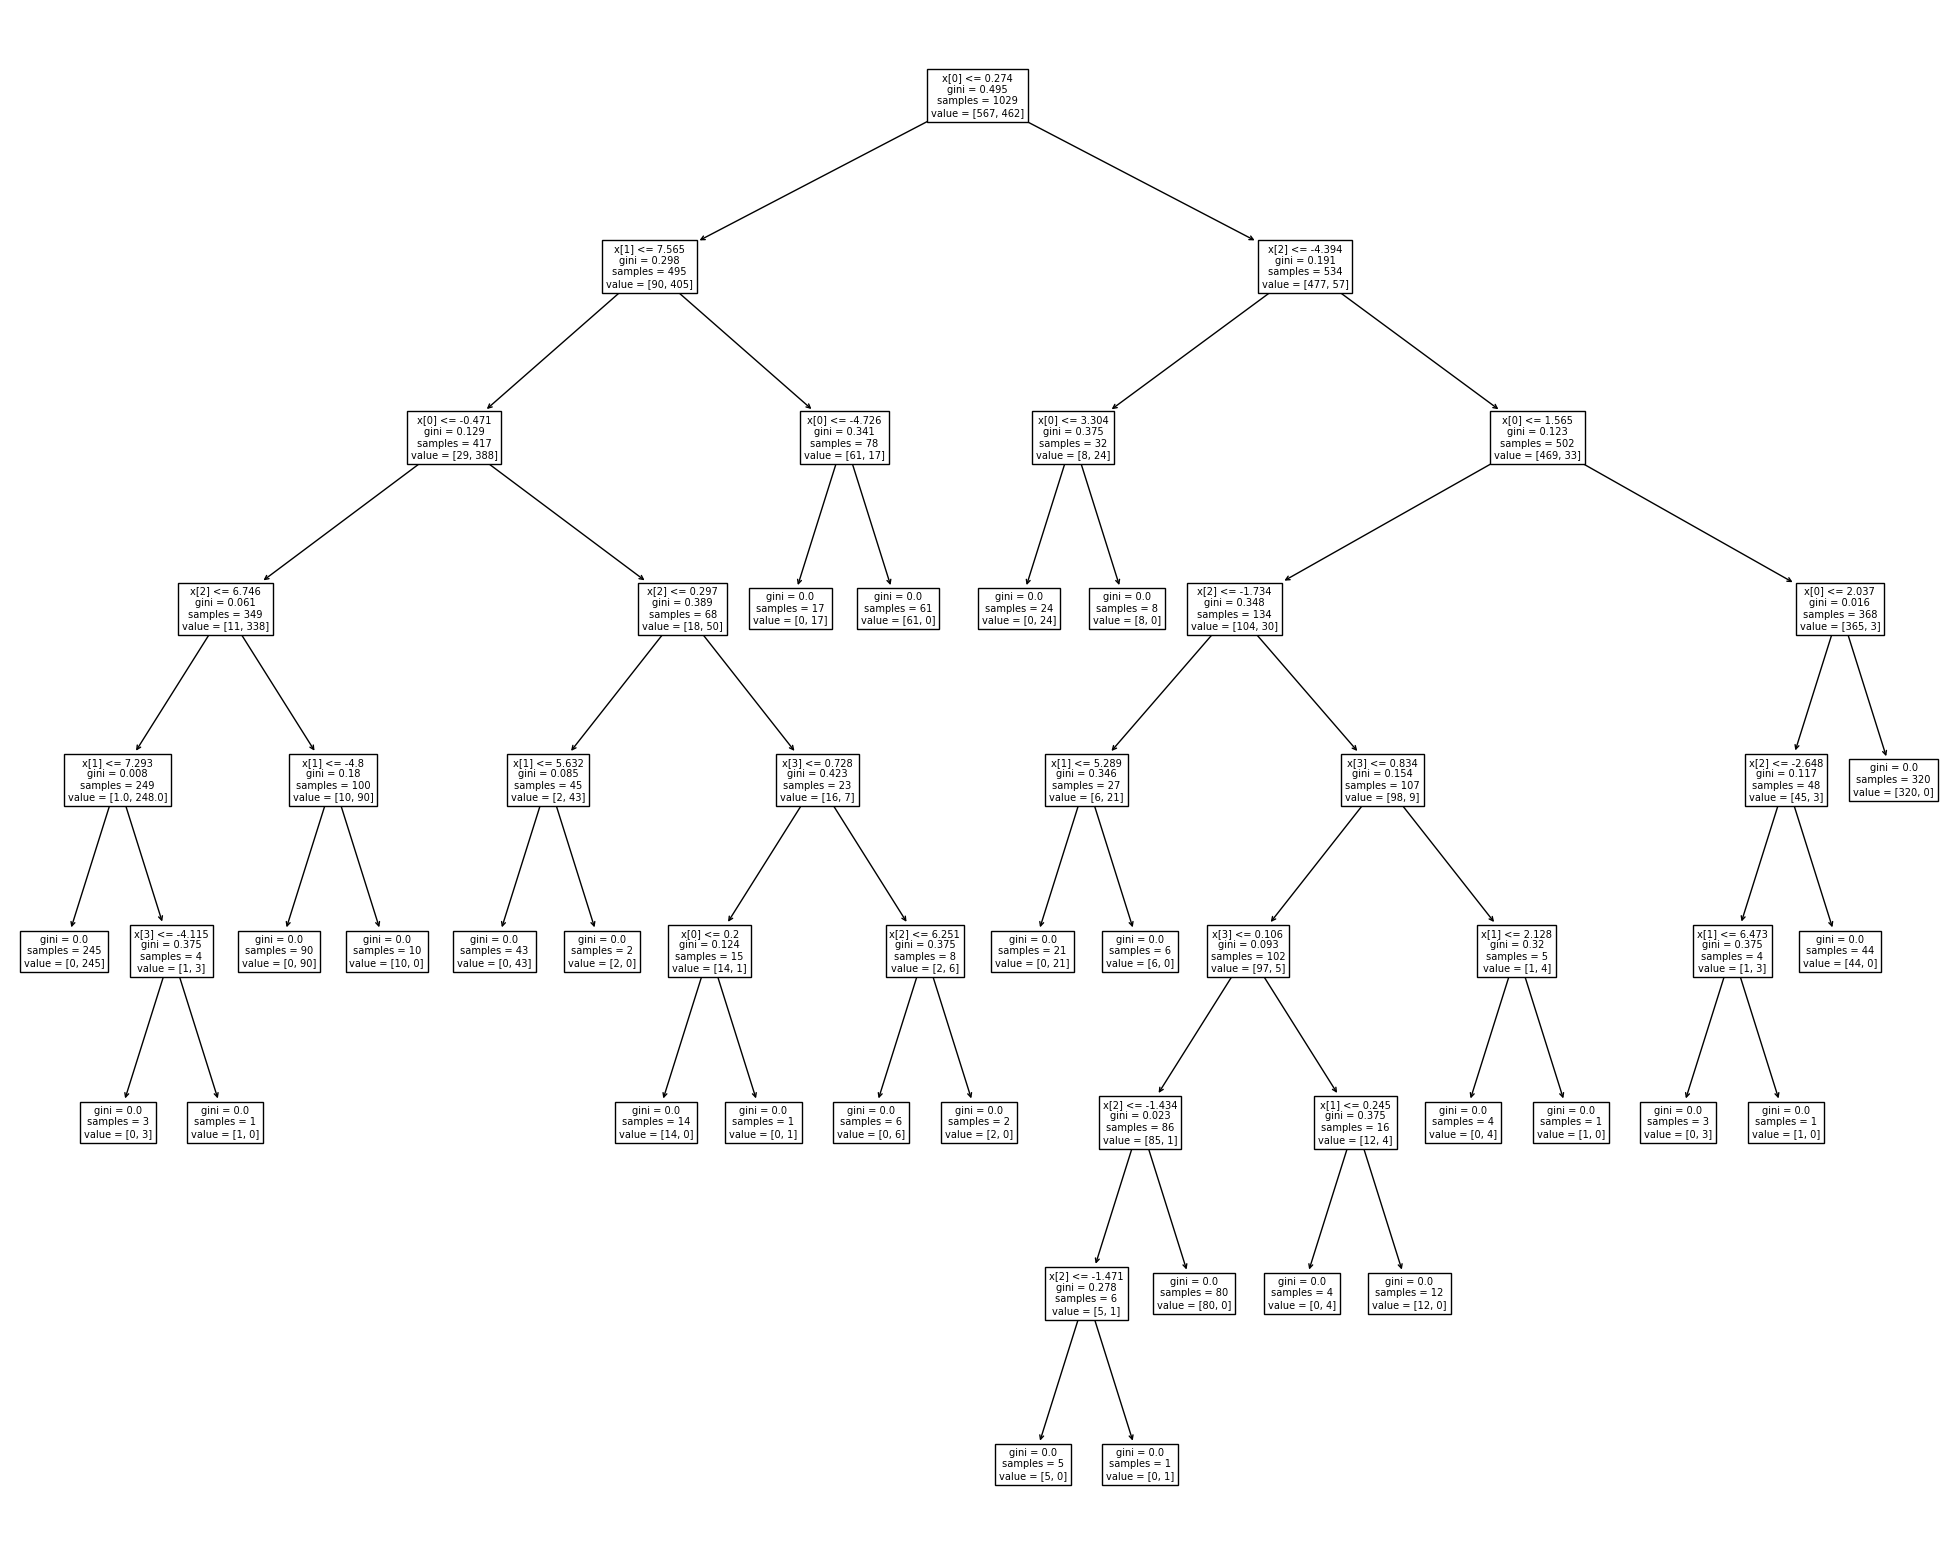

In [47]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt);

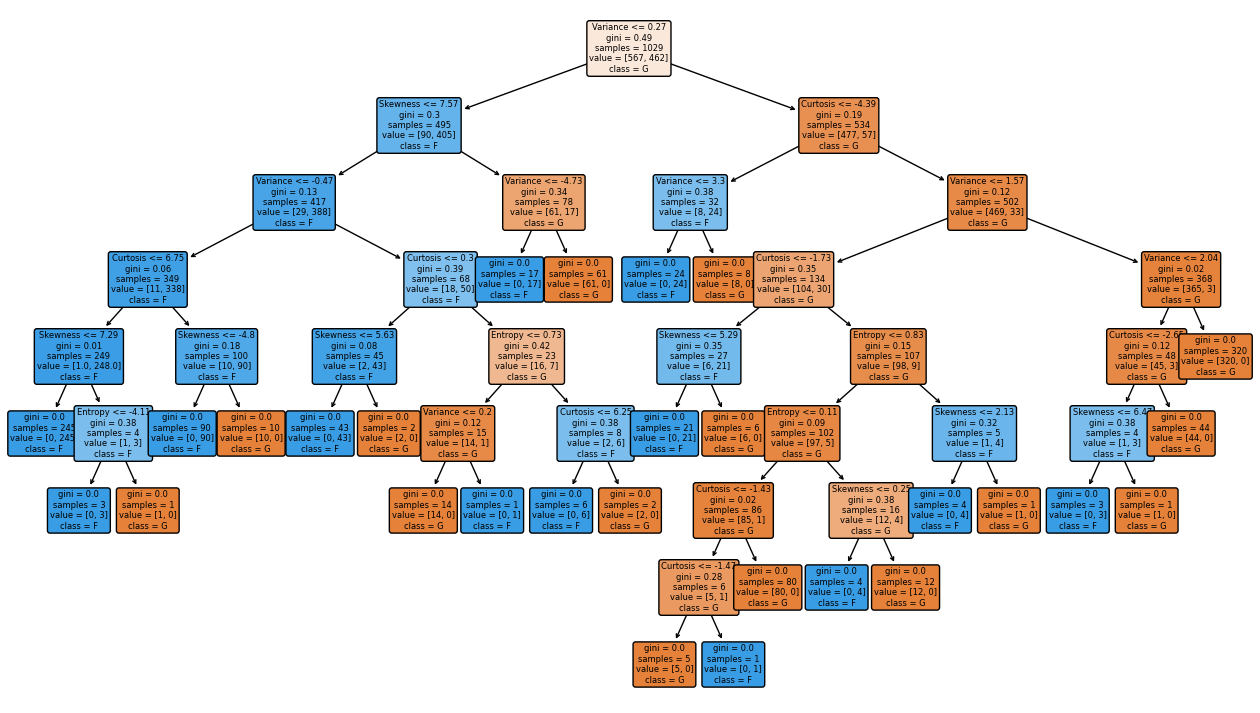

In [50]:
plt.figure(figsize=(16,9))
tree.plot_tree(dt, fontsize=6, feature_names=x.columns, class_names=['G', 'F'], filled=True, rounded=True, precision=2);

In [53]:
new = pd.DataFrame([[0.40614 , 1.34920 , -1.4501 , -0.55949],
                    [3.45660 , 9.52280 , -4.0112 , -3.59440],
                    [4.54590 , 8.16740 , -2.4586 , -1.46210]] , columns=x.columns)

In [54]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [55]:
dt.predict(new)

array([1, 0, 0], dtype=int64)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators=10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [59]:
y_pred = rf.predict(x_test)

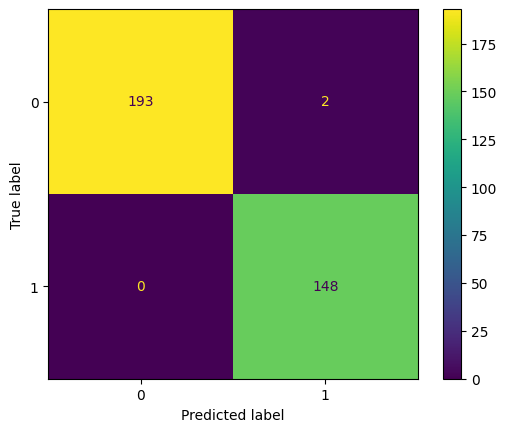

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [61]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [63]:
rf.predict(new)

array([1, 0, 0], dtype=int64)